In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-dimreduce-voting)

This matrix describes the votes on bills in the 111th session of the United States Senate. (The data set was obtained from [https://voteview.com].) Each row is one senator, and each column is a vote item.

In [2]:
from scipy.io import loadmat
vars = loadmat("../voting.mat")    # from the book's website
A = vars["A"]
m, n = A.shape
print("size:", (m, n))

size: (112, 696)


If we visualize the votes (yellow is "yea," blue is "nay"), we can see great similarity between many rows, reflecting party unity.

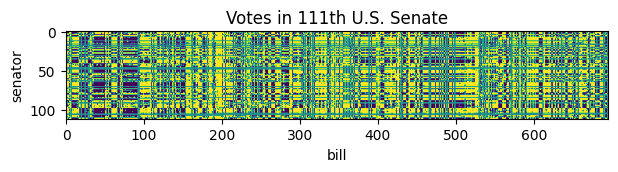

In [3]:
imshow(A, cmap="viridis")
xlabel("bill")
ylabel("senator")
title("Votes in 111th U.S. Senate");

We use {eq}`sing-val-decay` to quantify the decay rate of the values.

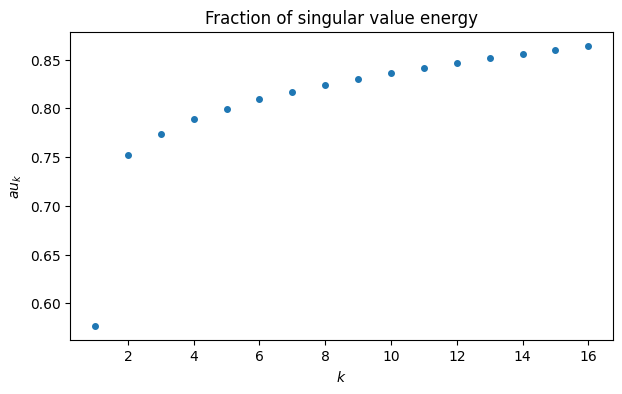

In [5]:
from scipy.linalg import svd
U, sigma, Vt = svd(A)
tau = cumsum(sigma**2) / sum(sigma**2)
plot(range(1, 17), tau[:16], "o")
xlabel("$k$")
ylabel("$\tau_k$")
title("Fraction of singular value energy");

The first and second singular triples contain about 58% and 17%, respectively, of the energy of the matrix. All others have far less effect, suggesting that the information is primarily two-dimensional. The first left and right singular vectors also contain interesting structure.

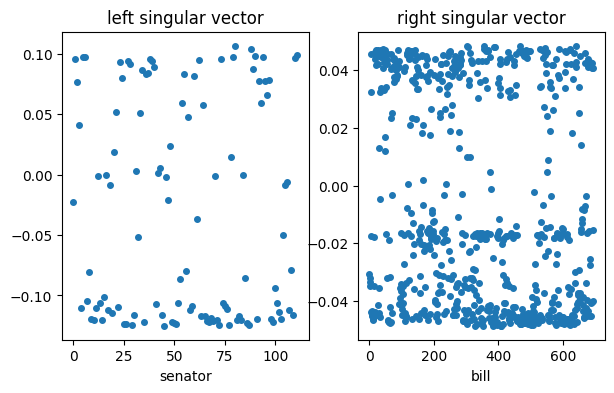

In [6]:
subplot(1, 2, 1)
plot(U[:, 0], "o")
xlabel("senator"),title("left singular vector")
subplot(1, 2, 2)
plot(Vt[0, :], "o")
xlabel("bill"), title("right singular vector");

Both vectors have values greatly clustered near $\pm C$ for a constant $C$. These can be roughly interpreted as how partisan a particular senator or bill was, and for which political party. Projecting the senators' vectors into the first two $\mathbf{V}$-coordinates gives a particularly nice way to reduce them to two dimensions. Political scientists label these dimensions *partisanship* and *bipartisanship*. Here we color them by actual party affiliation (also given in the data file): red for Republican, blue for Democrat, and yellow for independent.

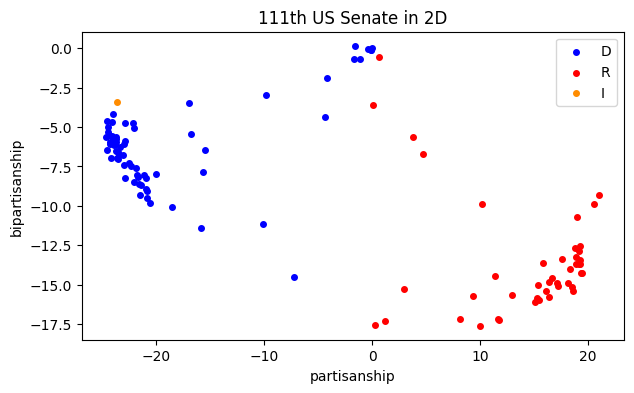

In [7]:
x1 = sigma[0] * U[:, 0]
x2 = sigma[1] * U[:, 1]

Rep = vars["Rep"] - 1
Dem = vars["Dem"] - 1
Ind = vars["Ind"] - 1

scatter(x1[Dem], x2[Dem], color="blue", label="D")
scatter(x1[Rep], x2[Rep], color="red", label="R")
scatter(x1[Ind], x2[Ind], color="darkorange", label="I")

xlabel("partisanship"),  ylabel("bipartisanship")
legend(),  title("111th US Senate in 2D");